In [1]:
import pandas as pd 
import numpy as np 

from string import ascii_letters
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('final_df.csv')

# Data Cleaning and EDA

Labeling the columns and getting rid of the extra index columns that remained after concatination of dataframes 

In [3]:
df = df.rename(columns={'0': 'mission', '1': 'tagline', '2': 'name', '3': 'category_name', '4': 'category_ID', '5': 'cause_name', '6': 'cause_ID', '7': 'city', '8': 'state', '9': 'zipcode', 
                   '10': 'current_score', '11': 'current_rating', '12': 'advisories', '13': 'accountability_score', '14': 'accountability_rating', '15': 'irs_org_type', '16': 'irs_classification', 
                   '17': 'npo_affilitation', '18': 'foundation_status', '19': 'irs_org_classification', '20': 'tax_deductibility', '21': 'npo_status', '22': 'org_assets', '23': 'org_income', 
                   '24': 'fin_score', '25': 'fin_rating'})

In [4]:
#Reviewing data types
df.dtypes

Unnamed: 0                  int64
index                       int64
mission                    object
tagline                    object
name                       object
category_name              object
category_ID                 int64
cause_name                 object
cause_ID                    int64
city                       object
state                      object
zipcode                     int64
current_score             float64
current_rating              int64
advisories                 object
accountability_score        int64
accountability_rating       int64
irs_org_type               object
irs_classification         object
npo_affilitation           object
foundation_status          object
irs_org_classification     object
tax_deductibility          object
npo_status                 object
org_assets                float64
org_income                float64
fin_score                 float64
fin_rating                  int64
dtype: object

In [5]:
#check for null values
df.isnull().sum()

Unnamed: 0                    0
index                         0
mission                       0
tagline                      23
name                          0
category_name                 0
category_ID                   0
cause_name                    0
cause_ID                      0
city                          0
state                         0
zipcode                       0
current_score                 0
current_rating                0
advisories                10794
accountability_score          0
accountability_rating         0
irs_org_type               1906
irs_classification           22
npo_affilitation             11
foundation_status             9
irs_org_classification     1906
tax_deductibility             9
npo_status                    9
org_assets                  117
org_income                  117
fin_score                     0
fin_rating                    0
dtype: int64

In [6]:
#Null values are tagline(23) advisories(10794), irs_org_type(1906), irs_classification(1906), tax_deductability(9), npo_status(9), org_assets(117), org_income(117)

In [6]:
#the majority of the organizations are 501(c)(3). Because of that we can drop this column
df['npo_status'].value_counts()

501(c)(3)    10809
Name: npo_status, dtype: int64

In [7]:
#almost all of the organiations in the dataset are also tax deductible 
df['tax_deductibility'].value_counts()

Contributions are deductible        10802
Deductibility not specified             6
Contributions are not deductible        1
Name: tax_deductibility, dtype: int64

In [8]:
#View category_name values
df['category_name'].value_counts()

Human Services                3029
Arts, Culture, Humanities     1565
Health                        1092
Community Development         1089
Education                      840
International                  754
Animals                        623
Religion                       559
Environment                    542
Human and Civil Rights         463
Research and Public Policy     262
Name: category_name, dtype: int64

In [9]:
#View cause_name values
df['cause_name'].value_counts()

Social Services                                              890
Youth Development, Shelter, and Crisis Services              726
Performing Arts                                              724
Museums                                                      514
United Ways                                                  507
Development and Relief Services                              476
Advocacy and Education                                       463
Youth Education Programs and Services                        429
Children's and Family Services                               429
Animal Rights, Welfare, and Services                         408
Environmental Protection and Conservation                    406
Religious Activities                                         377
Patient and Family Support                                   373
Housing and Neighborhood Development                         313
Diseases, Disorders, and Disciplines                         300
Food Banks, Food Pantries

In [10]:
#irs_classification
df['irs_classification'].value_counts()

Charitable Organization                        8161
Educational Organization                       1926
Religious Organization                          367
Organization to Prevent Cruelty to Animals      231
Literary Organization                            43
Scientific Organization                          42
Organization to Prevent Cruelty to Children      21
Organization for Public Safety Testing            5
Name: irs_classification, dtype: int64

In [11]:
#irs_org_type
df['irs_org_type'].value_counts()

Arts, Culture and Humanities                             1472
Human Services - Multipurpose and Other                  1255
Philanthropy, Voluntarism and Grantmaking Foundations     837
International, Foreign Affairs and National Security      685
Animal-Related                                            554
Educational Institutions and Related Activities           502
Environmental Quality, Protection and Beautification      458
Religion-Related, Spiritual Development                   403
Youth Development                                         382
Health - General and Rehabilitative                       373
Housing, Shelter                                          290
Food, Agriculture and Nutrition                           289
Diseases, Disorders, Medical Disciplines                  195
Recreation, Sports, Leisure, Athletics                    179
Crime, Legal-Related                                      165
Civil Rights, Social Action, Advocacy                     158
Communit

In [12]:
df['state'].value_counts()

CA    1170
NY    1071
DC     597
TX     590
FL     552
MA     478
VA     436
IL     410
PA     381
CO     324
OH     322
WA     283
MN     274
MI     272
GA     272
NC     271
TN     240
MD     239
NJ     218
MO     211
CT     175
WI     171
AZ     162
IN     158
OR     157
SC     106
OK     101
KY      95
AL      83
NE      82
LA      75
KS      74
IA      63
UT      62
MT      61
ME      59
NM      52
MS      48
AR      46
NV      45
NH      44
VT      42
RI      42
ID      35
SD      34
HI      29
DE      27
AK      23
WV      21
WY      20
ND      11
PR       3
VI       1
Name: state, dtype: int64

### Current Rating Distribution

In [13]:
#View current ratings 
df['current_rating'].value_counts()

3    4955
4    4304
2    1238
1     272
0      49
Name: current_rating, dtype: int64

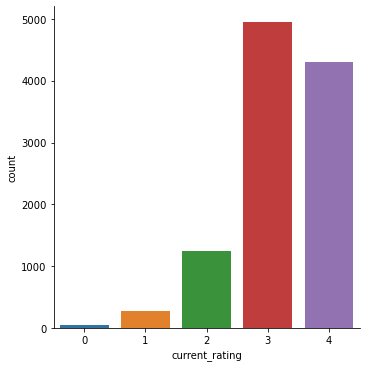

In [14]:
sns.catplot(x=df['current_rating'], kind='count', palette=None, data= df)

### Accountability Rating Distribution

In [15]:
#Accountability_rating value counts
df['accountability_rating'].value_counts()

4    6585
3    3183
2     632
1     322
0      96
Name: accountability_rating, dtype: int64

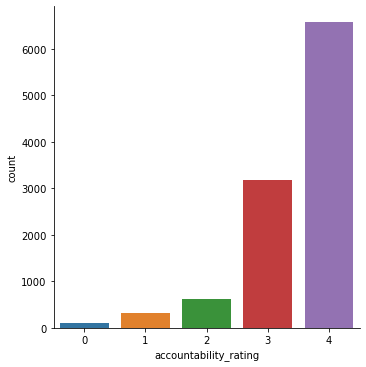

In [16]:
sns.catplot(x=df['accountability_rating'], kind='count', palette=None, data= df)

### Financial Rating Distribution

In [17]:
#fin_rating
df['fin_rating'].value_counts()

3    4509
4    3883
2    1890
1     479
0      57
Name: fin_rating, dtype: int64

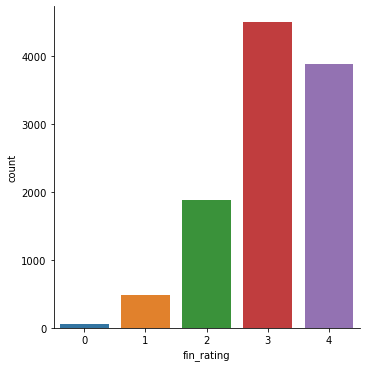

In [18]:
sns.catplot(x=df['fin_rating'], kind='count', palette=None, data= df)

In [19]:
#Dropping unhelpful values  advisories because there are 10794 missing values
df = df.drop(columns=['index', 'Unnamed: 0','advisories', 'npo_status', 'tax_deductibility', 
                    'irs_org_type', 'irs_classification', 'irs_org_type', 'zipcode', 
                    'irs_org_classification'])

In [20]:
df.head()

mission  \
0  Impact Alabama was founded in 2004 as the stat...   
1  Four Corners Ministries exists to communicate ...   
2  The Mobile Symphony Orchestra enhances lives b...   
3  Big Oak Ranch is a Christian home for children...   
4  The Community Foundation of Greater Huntsville...   

                                             tagline  \
0                  Engaging a Generation for Change.   
1                                    The Gospel Sent   
2  Working to create an environment that allows f...   
3     A Christian home for children needing a chance   
4                              A Smart Place to Give   

                                         name              category_name  \
0                              Impact America             Human Services   
1                     Four Corners Ministries                   Religion   
2                   Mobile Symphony Orchestra  Arts, Culture, Humanities   
3                               Big Oak Ranch             Human Services   
4  Community Foundation of Greater Huntsville      Community Development   

   category_ID                                       cause_name  cause_ID  \
0            6                                  Social Services        29   
1            9                             Religious Activities        26   
2            2                                  Performing Arts         4   
3            6  Youth Development, Shelter, and Crisis Services        16   
4           10                            Community Foundations        22   

          city state  current_score  current_rating  accountability_score  \
0   Birmingham    AL          85.98               3                    82   
1      Opelika    AL          89.04               3                    85   
2       Mobile    AL          75.03               2                    89   
3  Springville    AL          95.01               4                    93   
4   Huntsville    AL          95.47               4                    96   

   accountability_rating                                   npo_affilitation  \
0                      3  Independent - the organization is an independe...   
1                      3  Independent - the organization is an independe...   
2                      3  Independent - the organization is an independe...   
3                      4  Independent - the organization is an independe...   
4                      4  Independent - the organization is an independe...   

                                   foundation_status  org_assets  org_income  \
0  Organization which receives a substantial part...   2032739.0   3364323.0   
1  Organization that normally receives no more th...   2602296.0   1930948.0   
2  Organization that normally receives no more th...   1162334.0   1597054.0   
3  Organization which receives a substantial part...  49861768.0  22928887.0   
4  Organization which receives a substantial part...  25229948.0  12989927.0   

   fin_score  fin_rating  
0      91.70           4  
1      96.10           4  
2      66.45           1  
3      99.11           4  
4      95.00           4

In [76]:
#n=sns.PairGrid(df)
#n.map(sns.scatterplot)

In [21]:
hm_df = df.drop(columns= ['tagline','mission', 'name', 'category_name', 'cause_name', 'city', 'state', 'npo_affilitation', 'foundation_status'])
hm_df

category_ID  cause_ID  current_score  current_rating  \
0                6        29          85.98               3   
1                9        26          89.04               3   
2                2         4          75.03               2   
3                6        16          95.01               4   
4               10        22          95.47               4   
...            ...       ...            ...             ...   
10813            3        38          94.69               4   
10814            9        26          88.29               3   
10815            2         4          86.72               3   
10816            6        44          83.56               3   
10817            6        16          88.84               3   

       accountability_score  accountability_rating  org_assets  org_income  \
0                        82                      3   2032739.0   3364323.0   
1                        85                      3   2602296.0   1930948.0   
2                        89                      3   1162334.0   1597054.0   
3                        93                      4  49861768.0  22928887.0   
4                        96                      4  25229948.0  12989927.0   
...                     ...                    ...         ...         ...   
10813                   100                      4   2910090.0   3209288.0   
10814                   100                      4   2022340.0   2920052.0   
10815                    85                      3  69024438.0  27427101.0   
10816                    96                      4  12223443.0   3951340.0   
10817                    93                      4   5382840.0   2590905.0   

       fin_score  fin_rating  
0          91.70           4  
1          96.10           4  
2          66.45           1  
3          99.11           4  
4          95.00           4  
...          ...         ...  
10813      92.50           4  
10814      83.45           3  
10815      88.72           3  
10816      77.11           2  
10817      85.87           3  

[10818 rows x 10 columns]

<AxesSubplot:>

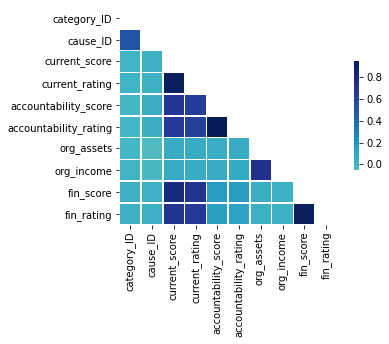

In [22]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
#f, ax = plt.subplots(figsize=11,9)
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = 'YlGnBu', 
            center = 0, square = True, 
            linewidths =.5, cbar_kws = {'shrink': .5})

From this we see that 

category_ID has a strong correlation with cause_ID

current_score has strong correlations with fin_rating, fin_score, accountability_rating, accountability_score



# Feature Engineering

In [75]:
df.head()

mission  \
0  Impact Alabama was founded in 2004 as the stat...   
1  Four Corners Ministries exists to communicate ...   
2  The Mobile Symphony Orchestra enhances lives b...   
3  Big Oak Ranch is a Christian home for children...   
4  The Community Foundation of Greater Huntsville...   

                                             tagline  \
0                  Engaging a Generation for Change.   
1                                    The Gospel Sent   
2  Working to create an environment that allows f...   
3     A Christian home for children needing a chance   
4                              A Smart Place to Give   

                                         name              category_name  \
0                              Impact America             Human Services   
1                     Four Corners Ministries                   Religion   
2                   Mobile Symphony Orchestra  Arts, Culture, Humanities   
3                               Big Oak Ranch             Human Services   
4  Community Foundation of Greater Huntsville      Community Development   

   category_ID                                       cause_name  cause_ID  \
0            6                                  Social Services        29   
1            9                             Religious Activities        26   
2            2                                  Performing Arts         4   
3            6  Youth Development, Shelter, and Crisis Services        16   
4           10                            Community Foundations        22   

          city state  current_score  current_rating  accountability_score  \
0   Birmingham    AL          85.98               3                    82   
1      Opelika    AL          89.04               3                    85   
2       Mobile    AL          75.03               2                    89   
3  Springville    AL          95.01               4                    93   
4   Huntsville    AL          95.47               4                    96   

   accountability_rating                                   npo_affilitation  \
0                      3  Independent - the organization is an independe...   
1                      3  Independent - the organization is an independe...   
2                      3  Independent - the organization is an independe...   
3                      4  Independent - the organization is an independe...   
4                      4  Independent - the organization is an independe...   

                                   foundation_status  org_assets  org_income  \
0  Organization which receives a substantial part...   2032739.0   3364323.0   
1  Organization that normally receives no more th...   2602296.0   1930948.0   
2  Organization that normally receives no more th...   1162334.0   1597054.0   
3  Organization which receives a substantial part...  49861768.0  22928887.0   
4  Organization which receives a substantial part...  25229948.0  12989927.0   

   fin_score  fin_rating  
0      91.70           4  
1      96.10           4  
2      66.45           1  
3      99.11           4  
4      95.00           4

In [24]:
df['Southeast'] = (df['state'] == 'MD') & (df['state'] =='DC') & (df['state'] =='DE') & (df['state'] =='WV') & (df['state'] =='VA') & (df['state'] =='KY') & (df['state'] =='NC') & (df['state'] =='TN') & (df['state'] =='SC') & (df['state'] =='GA') & (df['state'] =='FL') & (df['state'] =='AL') & (df['state'] =='MS') & (df['state'] =='AR') & (df['state'] =='LA')
#df['Southeast'] = df['Southeast'].replace([True, False] , [1,0]) 
                                          
df['Northeast'] = (df['state'] == 'ME') & (df['state'] =='NH') & (df['state'] =='MA') & (df['state'] =='VT') & (df['state'] =='RI') & (df['state'] =='CT') & (df['state'] =='NY') & (df['state'] =='PA') & (df['state'] == 'NJ')
#df['Northeast'] = df['Northeast'].replace([True, False] , [1,0])

df['Midwest'] = (df['state'] == 'OH') & (df['state'] =='MI') & (df['state'] =='IN') & (df['state'] =='IL') & (df['state'] =='WI') & (df['state'] =='MN') & (df['state'] =='IA') & (df['state'] =='MO') & (df['state'] =='ND') & (df['state'] =='SD') & (df['state'] =='NE') & (df['state'] =='KS')
#df['Midwest'] = df['Midwest'].replace([True, False], [1,0]) 


df['Southwest'] = (df['state'] == 'AZ') & (df['state'] == 'NM') & (df['state'] =='TX') & (df['state'] =='OK')
#df['Southwest'] = df['Southwest'].replace([True, False], [1,0])


df['West'] = (df['state'] =="CA") & (df['state'] =="HI") &  (df['state'] == "AK") & (df['state'] == "OR") & (df['state'] == "WA") & (df['state'] =="ID") & (df['state'] =="NV") & (df['state'] =="UT") & (df['state'] =="CO") & (df['state'] =="WY") & (df['state'] =="MT")
#df['West'] = df['West'].replace([True, False], [1,0])

In [29]:
southeast, northeast, midwest, southwest, west = [], [], [] , [], []


        

if df['state'] == 'CA':
    df['West'].append(1)
# else df['state'] == 'HI':
#     df['West'].append(True)
        

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Saving DF as a CSV File

# Base Model